# Kriging Interpolation
- One of Geographic information system interpolation
- Goal : (latitude, longitude, air pollution <- interpolation!)

In [2]:
import openturns as ot

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
dataset = pd.read_csv("air_pollution_new/Hour_10.csv", header = None)

In [199]:
dataset

,0,1,2,3
0,1,37.495,127.06,46
1,2,37.550,127.15,45
2,3,37.639,127.01,39
3,4,37.561,126.82,44
4,5,37.468,126.95,61
...,...,...,...,...
309,310,33.500,126.53,67
310,311,36.528,127.37,54
311,312,36.323,127.44,60
312,313,36.511,127.25,63


In [166]:
data = dataset.values[:,:]

latitude = data[:,1]
longitude = data[:,2]
z = data[:,3]

In [167]:
coo = []

for i in range(len(z)):
    coo.append([latitude[i], longitude[i]])

In [168]:
zz = []
for i in range(len(z)):
    zz.append([z[i]])

In [169]:
coo = np.array(coo)

In [170]:
zz = np.array(zz)
coo1 = np.array(coo[:,0])
coo2 = np.array(coo[:,1])

In [171]:
coo1 = coo1.reshape((314,1))
coo2 = coo2.reshape((314,1))
zz.shape

(314, 1)

In [174]:
print(coo1.shape)
print(coo2.shape)
print(zz.shape)

(314, 1)
(314, 1)
(314, 1)


(34.0, 38.0, 126.0, 130.0)

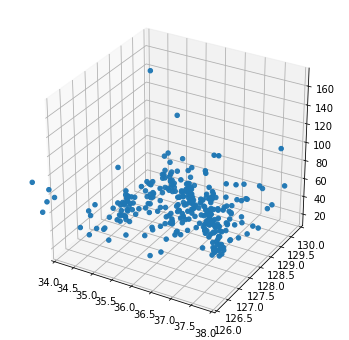

In [178]:
plt.rcParams["figure.figsize"] = (6,6)

fig = plt.figure()
ax1 = fig.gca(projection = '3d')

ax1.scatter(coo1, coo2, zz)
ax1.axis([34, 38, 126, 130])

In [182]:
# Input points
coordinates_train = ot.Sample(coo)

# Output points
precipitation_train = ot.Sample(zz) # At 2000/1/2

In [186]:
# Fit
inputDimension = 2
basis = ot.ConstantBasisFactory(inputDimension).build()
covarianceModel = ot.SquaredExponential([1.]*inputDimension, [1.0])
algo = ot.KrigingAlgorithm(coordinates_train, precipitation_train, covarianceModel, basis)
algo.run()
result = algo.getResult()
krigingMetamodel = result.getMetaModel()

In [187]:
new_lat = np.arange(34, 37.51, 0.0351)
new_lon = np.arange(126, 130.001, 0.0403)

print(new_lat.shape)
print(new_lon.shape)

(100,)
(100,)


In [190]:
from io import StringIO

def return_print(*message):
    io = StringIO()
    print(*message, file=io, end="")
    return io.getvalue()

In [191]:
xx, yy = np.meshgrid(new_lat, new_lon)

In [192]:
xxx = np.reshape(xx, (10000,1))
yyy = np.reshape(yy, (10000,1))

In [193]:
pred = []
for i in range(len(xxx)):
    new_coo = [float(xxx[i]), float(yyy[i])]
    precipitation = krigingMetamodel(new_coo)
    
    wow = return_print(precipitation)
    pred.append(wow)

In [194]:
prediction = []
for i in range(len(pred)):
    read = pred[i]
    read1 = read.replace("'", "")
    read2 = read1.replace("[", "")
    read3 = read2.replace("]", "")
    
    prediction.append(float(read3))

In [195]:
prediction1 = np.reshape(prediction, (100,100))
prediction1.shape

(100, 100)

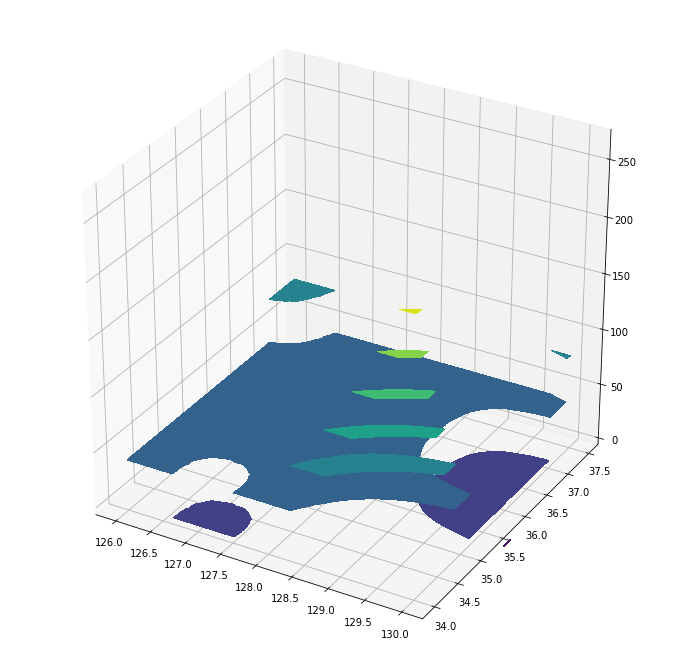

In [196]:
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax1 = fig.gca(projection = '3d')
ax1.contourf(yy,xx, prediction1)